In [1]:
import cv2
import numpy as np
import sys
import os
import glob
import torch

sys.path.append(os.path.dirname(os.path.dirname(os.getcwd())))

from demo.lib.preprocess import *
from dwpose.scripts.dwpose import DWposeDetector
from dwpose.scripts.tool import read_frames

In [2]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
detector = DWposeDetector(
    det_config = "D:\\github\\skating-ai\\v3\\pose\\dwpose\\config\\yolox_l_8xb8-300e_coco.py",
    # det_ckpt = args.yolox_ckpt,
    pose_config = "D:\\github\\skating-ai\\v3\\pose\\dwpose\\config\\dwpose-l_384x288.py",
    # pose_ckpt = args.dwpose_ckpt, 
    keypoints_only=True
    )    
detector = detector.to(device)

Loads checkpoint by http backend from path: https://download.openmmlab.com/mmdetection/v2.0/yolox/yolox_l_8x8_300e_coco/yolox_l_8x8_300e_coco_20211126_140236-d3bd2b23.pth
Loads checkpoint by http backend from path: https://huggingface.co/wanghaofan/dw-ll_ucoco_384/resolve/main/dw-ll_ucoco_384.pth


In [3]:
video_paths = glob.glob("D:\\github\\FS-Jump3D\\data\\**\\*.mp4", recursive=True)
video_path = video_paths[0]
frame = read_frames(video_path)[-100]
kpts2d = []
score2d = []

person_idx = 0

pose = detector(frame)
candidate = pose["bodies"]["candidate"]
subset = pose["bodies"]["subset"]
num_person = subset.shape[0]
num_joints = subset.shape[1]
keypoint = candidate.reshape(num_person, num_joints, 2)

kpt, score = coco_coco(keypoint[0], subset[0])
kpts2d.append(kpt)
score2d.append(score)

c:\Users\user\dev\Python\Python311\Lib\site-packages\mmdet\models\backbones\csp_darknet.py:118: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=False):
c:\Users\user\dev\Python\Python311\Lib\site-packages\torch\functional.py:554: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\pytorch\aten\src\ATen\native\TensorShape.cpp:4316.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
c:\Users\user\dev\Python\Python311\Lib\site-packages\mmdet\models\layers\se_layer.py:158: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=False):


In [4]:
kpts2d = np.expand_dims(np.array(kpts2d), axis=1)
score2d = np.expand_dims(np.array(score2d), axis=1)

kpts2d, score2d, _ = h36m_coco_format(kpts2d, score2d)
kpts2d = kpts2d.squeeze(axis=1)
score2d = score2d.squeeze(axis=1)

In [5]:
kpts2d.shape

(1, 17, 2)

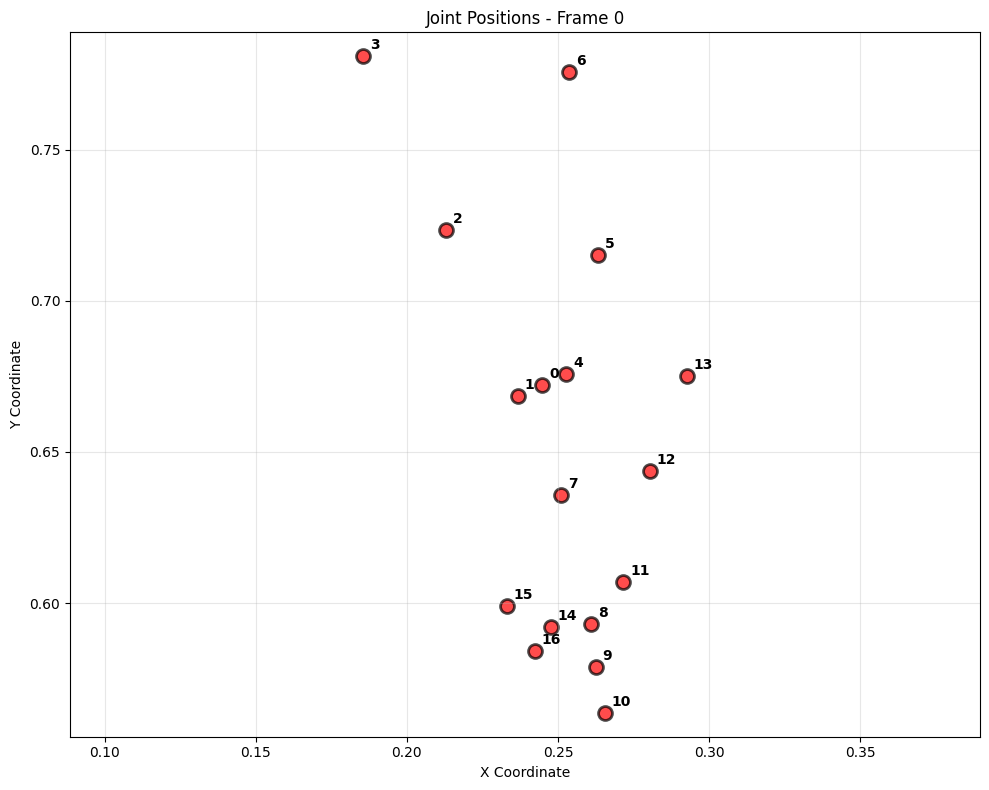

In [8]:
import matplotlib.pyplot as plt
import numpy as np

frame_idx = 0
single_frame = kpts2d[0]

plt.figure(figsize=(10, 8))

x_coords = single_frame[:, 0]
y_coords = single_frame[:, 1]

plt.scatter(x_coords, y_coords, c='red', s=100, alpha=0.7, edgecolors='black', linewidth=2)

for i, (x, y) in enumerate(single_frame):
    plt.annotate(f'{i}', (x, y), xytext=(5, 5), textcoords='offset points', 
                fontsize=10, fontweight='bold')

plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title(f'Joint Positions - Frame {frame_idx}')
plt.grid(True, alpha=0.3)
plt.axis('equal')
plt.tight_layout()
plt.show()